In [2]:
%matplotlib inline

# Introduction to NLP with NLTK

Natural Language Processing (NLP) is often taught at the academic level from the perspective of computational linguists. However, as data scientists, we have a richer view of the natural language world - unstructured data that by its very nature has latent information that is important to humans. NLP practioners have benefited from machine learning techniques to unlock meaning from large corpora, and in this class we’ll explore how to do that particularly with Python and with the Natural Language Toolkit (NLTK). 

NLTK is an excellent library for machine-learning based NLP, written in Python by experts from both academia and industry. Python allows you to create rich data applications rapidly, iterating on hypotheses. The combination of Python + NLTK means that you can easily add language-aware data products to your larger analytical workflows and applications. 

## Quick Overview of NLTK
NLTK stands for the Natural Language Toolkit and is written by two eminent computational linguists, Steven Bird (Senior Research Associate of the LDC and professor at the University of Melbourne) and Ewan Klein (Professor of Linguistics at Edinburgh University). NTLK provides a combination of natural language corpora, lexical resources, and example grammars with language processing algorithms, methodologies and demonstrations for a very pythonic "batteries included" view of Natural Language Processing.   

As such, NLTK is perfect for researh driven (hypothesis driven) workflows for agile data science. Its suite of libraries includes:

- tokenization, stemming, and tagging
- chunking and parsing
- language modeling
- classification and clustering
- logical semantics

NLTK is a useful pedagogical resource for learning NLP with Python and serves as a starting place for producing production grade code that requires natural language analysis. It is also important to understand what NLTK is _not_:

- Production ready out of the box
- Lightweight
- Generally applicable
- Magic

NLTK provides a variety of tools that can be used to explore the linguistic domain but is not a lightweight dependency that can be easily included in other workflows, especially those that require unit and integration testing or other build processes. This stems from the fact that NLTK includes a lot of added code but also a rich and complete library of corpora that power the built-in algorithms. 

### The Good parts of NLTK

- Preprocessing
    - segmentation
    - tokenization
    - PoS tagging
- Word level processing
    - WordNet
    - Lemmatization
    - Stemming
    - NGrams
- Utilities
    - Tree
    - FreqDist
    - ConditionalFreqDist
    - Streaming CorpusReaders
- Classification
    - Maximum Entropy
    - Naive Bayes
    - Decision Tree
- Chunking
- Named Entity Recognition
- Parsers Galore!

### The Bad parts of NLTK

- Syntactic Parsing

    - No included grammar (not a black box)
    - No Feature/Dependency Parsing
    - No included feature grammar

- The sem package
    
    - Toy only (lambda-calculus & first order logic)

- Lots of extra stuff (heavyweight dependency)

    - papers, chat programs, alignments, etc.

Knowing the good and the bad parts will help you explore NLTK further - looking into the source code to extract the material you need, then moving that code to production. We will explore NLTK in more detail in the rest of this notebook. 

## Installing NLTK

This notebook has a few dependencies, most of which can be installed via the python package manger - `pip`. 

1. Python 2.7 or later (anaconda is ok)
2. NLTK
3. The NLTK corpora 
4. The BeautifulSoup library
5. The gensim libary

Once you have Python and pip installed you can install NLTK as follows:

    ~$ pip install nltk
    
    ~$ pip install matplotlib
    
    ~$ pip install beautifulsoup4
    
    ~$ pip install gensim

Note that these will also install Numpy and Scipy if they aren't already installed. 

To download the corpora, open a python interperter:


In [3]:
import nltk

In [ ]:
nltk.download()

This will open up a window with which you can download the various corpora and models to a specified location. For now, go ahead and download it all as we will be exploring as much of NLTK as we can. Also take note of the `download_directory` - you're going to want to know where that is so you can get a detailed look at the corpora that's included. I usually export an enviornment variable to track this:

    ~$ export NLTK_DATA=/path/to/nltk_data
    
_Take a momement to explore what is in this directory_

## Working with Example Corpora

NLTK ships with a variety of corpora, let's use a few of them to do some work. Get access to the text from _Moby Dick_ as follows:

In [4]:
moby = nltk.text.Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))

The `nltk.text.Text` class is a wrapper around a sequence of simple (string) tokens - intended only for _the initial exploration of text_ usually via the Python REPL. It has the following methods:

- common_contexts
- concordance
- collocations
- count
- plot
- findall
- index

You shouldn't use this class in production level systems, but it is useful to explore (small) snippets of text in a meaningful fashion.

The corcordance function performs a search for the given token and then also provides the surrounding context:


In [11]:
moby.concordance("monstrous", 55, lines=10)

Displaying 10 of 11 matches:
er , one was of a most monstrous size . ... This came t
ALMS . " Touching that monstrous bulk of the whale or o
 a heathenish array of monstrous clubs and spears . Som
ed , and wondered what monstrous cannibal and savage co
vived the flood ; most monstrous and most mountainous !
cout at Moby Dick as a monstrous fable , or still worse
 .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I
 In connexion with the monstrous pictures of whales , I
 upon those still more monstrous stories of them which 
n rummaged out of this monstrous cabinet there is no te


Given some context surrounding a word, we can discover similar words, e.g. words that that occur frequently in the same context and with a similar distribution: Distributional similarity: 

In [15]:
print moby.similar("ahab")
austen = nltk.text.Text(nltk.corpus.gutenberg.words('austen-sense.txt'))
print
print austen.similar("monstrous")

it that he queequeg stubb him there starbuck man i what then and all
me this peleg here which them
None

very exceedingly so heartily a great good amazingly as sweet
remarkably extremely vast
None


As you can see, this takes a bit of time to build the index in memory, one of the reasons it's not suggested to use this class in production code. Now that we can do searching and similarity, find the common contexts of a set of words:

In [16]:
moby.common_contexts(["ahab", "starbuck"])

to_s of_and murmured_gazing cried_let by_s but_s and_s to_the
cried_give in_the of_s with_the cried_to at_s cried_look


_your turn, go ahead and explore similar words and contexts - what does the common context mean?_

NLTK also uses matplotlib and pylab to display graphs and charts that can show dispersions and frequency. This is especially interesting for the corpus of innagural addresses given by U.S. presidents.

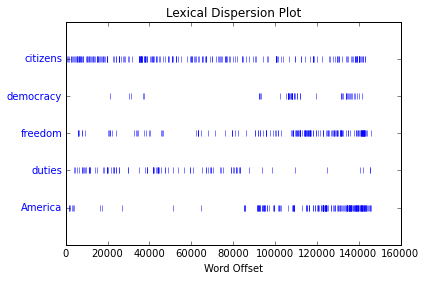

In [17]:
inaugural = nltk.text.Text(nltk.corpus.inaugural.words())
inaugural.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

To explore much of the built in corpus, use the following methods:

In [18]:
# Lists the various corpora and CorpusReader classes in the nltk.corpus module
for name in dir(nltk.corpus):
    if name.islower() and not name.startswith('_'): print name

abc
alpino
brown
cess_cat
cess_esp
cmudict
comtrans
conll2000
conll2002
conll2007
demo
dependency_treebank
find_corpus_fileids
floresta
framenet
gazetteers
genesis
gutenberg
ieer
inaugural
indian
ipipan
jeita
knbc
lin_thesaurus
mac_morpho
machado
masc_tagged
movie_reviews
names
nombank
nombank_ptb
nps_chat
pl196x
ppattach
propbank
propbank_ptb
ptb
qc
re
reader
reuters
rte
semcor
senseval
sentiwordnet
shakespeare
sinica_treebank
state_union
stopwords
swadesh
switchboard
tagged_treebank_para_block_reader
teardown_module
timit
timit_tagged
toolbox
treebank
treebank_chunk
treebank_raw
udhr
udhr2
util
verbnet
webtext
wordnet
wordnet_ic
words
ycoe


In [19]:
# For a specific corpus, list the fileids that are available:
print nltk.corpus.shakespeare.fileids()

[u'a_and_c.xml', u'dream.xml', u'hamlet.xml', u'j_caesar.xml', u'macbeth.xml', u'merchant.xml', u'othello.xml', u'r_and_j.xml']


In [20]:
print nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt', u'austen-persuasion.txt', u'austen-sense.txt', u'bible-kjv.txt', u'blake-poems.txt', u'bryant-stories.txt', u'burgess-busterbrown.txt', u'carroll-alice.txt', u'chesterton-ball.txt', u'chesterton-brown.txt', u'chesterton-thursday.txt', u'edgeworth-parents.txt', u'melville-moby_dick.txt', u'milton-paradise.txt', u'shakespeare-caesar.txt', u'shakespeare-hamlet.txt', u'shakespeare-macbeth.txt', u'whitman-leaves.txt']


In [35]:
print nltk.corpus.stopwords.fileids()
nltk.corpus.stopwords.words('english')
import string
print string.punctuation

[u'danish', u'dutch', u'english', u'finnish', u'french', u'german', u'hungarian', u'italian', u'norwegian', u'portuguese', u'russian', u'spanish', u'swedish', u'turkish']
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


These corpora export several vital methods:

- paras (iterate through each paragraph)
- sents (iterate through each sentence)
- words (iterate through each word)
- raw   (get access to the raw text)

In [22]:
corpus = nltk.corpus.brown
print corpus.paras()

[[[u'The', u'Fulton', u'County', u'Grand', u'Jury', u'said', u'Friday', u'an', u'investigation', u'of', u"Atlanta's", u'recent', u'primary', u'election', u'produced', u'``', u'no', u'evidence', u"''", u'that', u'any', u'irregularities', u'took', u'place', u'.']], [[u'The', u'jury', u'further', u'said', u'in', u'term-end', u'presentments', u'that', u'the', u'City', u'Executive', u'Committee', u',', u'which', u'had', u'over-all', u'charge', u'of', u'the', u'election', u',', u'``', u'deserves', u'the', u'praise', u'and', u'thanks', u'of', u'the', u'City', u'of', u'Atlanta', u"''", u'for', u'the', u'manner', u'in', u'which', u'the', u'election', u'was', u'conducted', u'.']], ...]


In [23]:
print corpus.sents()

[[u'The', u'Fulton', u'County', u'Grand', u'Jury', u'said', u'Friday', u'an', u'investigation', u'of', u"Atlanta's", u'recent', u'primary', u'election', u'produced', u'``', u'no', u'evidence', u"''", u'that', u'any', u'irregularities', u'took', u'place', u'.'], [u'The', u'jury', u'further', u'said', u'in', u'term-end', u'presentments', u'that', u'the', u'City', u'Executive', u'Committee', u',', u'which', u'had', u'over-all', u'charge', u'of', u'the', u'election', u',', u'``', u'deserves', u'the', u'praise', u'and', u'thanks', u'of', u'the', u'City', u'of', u'Atlanta', u"''", u'for', u'the', u'manner', u'in', u'which', u'the', u'election', u'was', u'conducted', u'.'], ...]


In [24]:
print corpus.words()

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]


In [25]:
print corpus.raw()[:200] # Be careful!



	The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' tha


_Your turn! Explore some of the text in the available corpora_

## Frequency Analyses

In statistical machine learning approaches to NLP, the very first thing we need to do is count things - especially the unigrams that appear in the text and their relationships to each other. NLTK provides two very excellent classes to enable these frequency analyses:

- `FreqDist`
- `ConditionalFreqDist` 

And these two classes serve as the foundation for most of the probability and statistical analyses that we will conduct.

First we will compute the following:

- The count of words
- The vocabulary (unique words)
- The lexical diversity (the ratio of word count to vocabulary)

In [26]:
reuters = nltk.corpus.reuters # Corpus of news articles
counts  = nltk.FreqDist(reuters.words())
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print "Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv)

Corpus has 41600 types and 1720901 tokens for a lexical diversity of 41.368


In [27]:
counts.B()

41600

In [28]:
print counts.most_common(40)  # The n most common tokens in the corpus

[(u'.', 94687), (u',', 72360), (u'the', 58251), (u'of', 35979), (u'to', 34035), (u'in', 26478), (u'said', 25224), (u'and', 25043), (u'a', 23492), (u'mln', 18037), (u'vs', 14120), (u'-', 13705), (u'for', 12785), (u'dlrs', 11730), (u"'", 11272), (u'The', 10968), (u'000', 10277), (u'1', 9977), (u's', 9298), (u'pct', 9093), (u'it', 8842), (u';', 8762), (u'&', 8698), (u'lt', 8694), (u'on', 8556), (u'from', 7986), (u'cts', 7953), (u'is', 7580), (u'>', 7449), (u'that', 7377), (u'its', 7265), (u'by', 6872), (u'"', 6816), (u'at', 6537), (u'2', 6528), (u'U', 6388), (u'S', 6382), (u'year', 6310), (u'be', 6288), (u'with', 5945)]


In [29]:
print counts.max() # The most frequent token in the corpus

.


In [30]:
print counts.hapaxes()[0:10]  # A list of all hapax legomena 

[u'Durapipe', u'HARDIE', u'localized', u'regularize', u'LASR', u'passsengers', u'Valli', u'pages', u'stipulate', u'TRAF']


In [38]:
counts.freq('stipulate') * 100 # percentage of the corpus for this token

5.810909517746808e-05

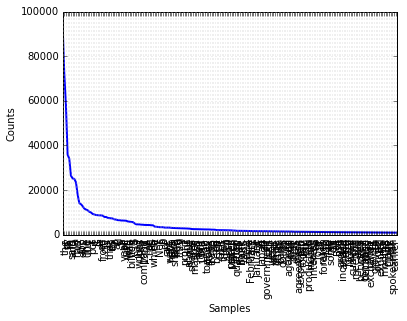

In [40]:
counts.plot(200, cumulative=False)

In [41]:
from itertools import chain 

brown = nltk.corpus.brown
categories = brown.categories()

counts = nltk.ConditionalFreqDist(chain(*[[(cat, word) for word in brown.words(categories=cat)] for cat in categories]))

for category, dist in counts.items():
    vocab  = len(dist.keys())
    tokens = sum(dist.values())
    lexdiv = float(tokens) / float(vocab)
    print "%s: %i types with %i tokens and lexical diveristy of %0.3f" % (category, vocab, tokens, lexdiv)

[u'adventure', u'belles_lettres', u'editorial', u'fiction', u'government', u'hobbies', u'humor', u'learned', u'lore', u'mystery', u'news', u'religion', u'reviews', u'romance', u'science_fiction']
mystery: 6982 types with 57169 tokens and lexical diveristy of 8.188
belles_lettres: 18421 types with 173096 tokens and lexical diveristy of 9.397
humor: 5017 types with 21695 tokens and lexical diveristy of 4.324
government: 8181 types with 70117 tokens and lexical diveristy of 8.571
fiction: 9302 types with 68488 tokens and lexical diveristy of 7.363
reviews: 8626 types with 40704 tokens and lexical diveristy of 4.719
religion: 6373 types with 39399 tokens and lexical diveristy of 6.182
romance: 8452 types with 70022 tokens and lexical diveristy of 8.285
science_fiction: 3233 types with 14470 tokens and lexical diveristy of 4.476
adventure: 8874 types with 69342 tokens and lexical diveristy of 7.814
editorial: 9890 types with 61604 tokens and lexical diveristy of 6.229
hobbies: 11935 types w

_Your turn: compute the conditional frequency distribution of bigrams in a corpus_

Hint:


In [46]:
for bigram in nltk.ngrams(["The", "bear", "walked", "in", "the", "woods", "at", "midnight"], 5):
    print bigram

    

('The', 'bear', 'walked', 'in', 'the')
('bear', 'walked', 'in', 'the', 'woods')
('walked', 'in', 'the', 'woods', 'at')
('in', 'the', 'woods', 'at', 'midnight')


## Preprocessing Text

NLTK is great at the preprocessing of Raw text - it provides the following tools for dividing text into it's constituent parts:

- `sent_tokenize`: a Punkt sentence tokenizer:

    This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.  It must be trained on a large collection of plaintext in the target language before it can be used.
    
    However, Punkt is designed to learn parameters (a list of abbreviations, etc.) unsupervised from a corpus similar to the target domain. The pre-packaged models may therefore be unsuitable: use PunktSentenceTokenizer(text) to learn parameters from the given text.
    
    
- `word_tokenize`: a Treebank tokenizer 

    The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank. This is the method that is invoked by ``word_tokenize()``.  It assumes that the text has already been segmented into sentences, e.g. using ``sent_tokenize()``.
    

- `pos_tag`: a maximum entropy tagger trained on the Penn Treebank

    There are several other taggers including (notably) the BrillTagger as well as the BrillTrainer to train your own tagger or tagset. 

In [47]:
text = u"Medical personnel returning to New York and New Jersey from the Ebola-riddled countries in West Africa will be automatically quarantined if they had direct contact with an infected person, officials announced Friday. New York Gov. Andrew Cuomo (D) and New Jersey Gov. Chris Christie (R) announced the decision at a joint news conference Friday at 7 World Trade Center. “We have to do more,” Cuomo said. “It’s too serious of a situation to leave it to the honor system of compliance.” They said that public-health officials at John F. Kennedy and Newark Liberty international airports, where enhanced screening for Ebola is taking place, would make the determination on who would be quarantined. Anyone who had direct contact with an Ebola patient in Liberia, Sierra Leone or Guinea will be quarantined. In addition, anyone who traveled there but had no such contact would be actively monitored and possibly quarantined, authorities said. This news came a day after a doctor who had treated Ebola patients in Guinea was diagnosed in Manhattan, becoming the fourth person diagnosed with the virus in the United States and the first outside of Dallas. And the decision came not long after a health-care worker who had treated Ebola patients arrived at Newark, one of five airports where people traveling from West Africa to the United States are encountering the stricter screening rules."

for sent in nltk.sent_tokenize(text): 
    print sent
    print


Medical personnel returning to New York and New Jersey from the Ebola-riddled countries in West Africa will be automatically quarantined if they had direct contact with an infected person, officials announced Friday.

New York Gov.

Andrew Cuomo (D) and New Jersey Gov.

Chris Christie (R) announced the decision at a joint news conference Friday at 7 World Trade Center.

“We have to do more,” Cuomo said.

“It’s too serious of a situation to leave it to the honor system of compliance.” They said that public-health officials at John F. Kennedy and Newark Liberty international airports, where enhanced screening for Ebola is taking place, would make the determination on who would be quarantined.

Anyone who had direct contact with an Ebola patient in Liberia, Sierra Leone or Guinea will be quarantined.

In addition, anyone who traveled there but had no such contact would be actively monitored and possibly quarantined, authorities said.

This news came a day after a doctor who had treated Eb

In [49]:
for sent in nltk.sent_tokenize(text):
    print list(nltk.wordpunct_tokenize(sent))
    print

[u'Medical', u'personnel', u'returning', u'to', u'New', u'York', u'and', u'New', u'Jersey', u'from', u'the', u'Ebola', u'-', u'riddled', u'countries', u'in', u'West', u'Africa', u'will', u'be', u'automatically', u'quarantined', u'if', u'they', u'had', u'direct', u'contact', u'with', u'an', u'infected', u'person', u',', u'officials', u'announced', u'Friday', u'.']

[u'New', u'York', u'Gov', u'.']

[u'Andrew', u'Cuomo', u'(', u'D', u')', u'and', u'New', u'Jersey', u'Gov', u'.']

[u'Chris', u'Christie', u'(', u'R', u')', u'announced', u'the', u'decision', u'at', u'a', u'joint', u'news', u'conference', u'Friday', u'at', u'7', u'World', u'Trade', u'Center', u'.']

[u'\u201c', u'We', u'have', u'to', u'do', u'more', u',\u201d', u'Cuomo', u'said', u'.']

[u'\u201c', u'It', u'\u2019', u's', u'too', u'serious', u'of', u'a', u'situation', u'to', u'leave', u'it', u'to', u'the', u'honor', u'system', u'of', u'compliance', u'.\u201d', u'They', u'said', u'that', u'public', u'-', u'health', u'officials

In [50]:
for sent in nltk.sent_tokenize(text):
    print list(nltk.pos_tag(nltk.word_tokenize(sent)))
    print

[(u'Medical', 'JJ'), (u'personnel', 'NN'), (u'returning', 'NN'), (u'to', 'TO'), (u'New', 'NNP'), (u'York', 'NNP'), (u'and', 'CC'), (u'New', 'NNP'), (u'Jersey', 'NNP'), (u'from', 'IN'), (u'the', 'DT'), (u'Ebola-riddled', 'JJ'), (u'countries', 'NNS'), (u'in', 'IN'), (u'West', 'NNP'), (u'Africa', 'NNP'), (u'will', 'MD'), (u'be', 'VB'), (u'automatically', 'RB'), (u'quarantined', 'VBN'), (u'if', 'IN'), (u'they', 'PRP'), (u'had', 'VBD'), (u'direct', 'JJ'), (u'contact', 'NN'), (u'with', 'IN'), (u'an', 'DT'), (u'infected', 'VBN'), (u'person', 'NN'), (u',', ','), (u'officials', 'NNS'), (u'announced', 'VBD'), (u'Friday', 'NNP'), (u'.', '.')]

[(u'New', 'NNP'), (u'York', 'NNP'), (u'Gov', 'NNP'), (u'.', '.')]

[(u'Andrew', 'NNP'), (u'Cuomo', 'NNP'), (u'(', 'NNP'), (u'D', 'NNP'), (u')', 'NNP'), (u'and', 'CC'), (u'New', 'NNP'), (u'Jersey', 'NNP'), (u'Gov', 'NNP'), (u'.', '.')]

[(u'Chris', 'NNP'), (u'Christie', 'NNP'), (u'(', 'NNP'), (u'R', 'NNP'), (u')', 'NNP'), (u'announced', 'VBD'), (u'the', 'DT'

All of these taggers work _pretty_ well - but you can (and should train them on your own corpora). 

## Stemming and Lemmatization

We have an immense number of word forms as you can see from our various counts in the `FreqDist` above - it is helpful for many applications to normalize these word forms (especially applications like search) into some canonical word for further exploration. In English (and many other languages) - mophological context indicate gender, tense, quantity, etc. but these sublties might not be necessary:

Stemming = chop off affixes to get the root stem of the word:

    running --> run
    flowers --> flower
    geese   --> geese 
    
Lemmatization = look up word form in a lexicon to get canonical lemma

    women   --> woman
    foxes   --> fox
    sheep   --> sheep
    
There are several stemmers available:

    - Lancaster (English, newer and aggressive)
    - Porter (English, original stemmer)
    - Snowball (Many langauges, newest)
    
The Lemmatizer uses the WordNet lexicon
    

In [53]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

text = list(nltk.word_tokenize("The women running in the fog passed bunnies working as computer scientists."))

snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in text]
    print " ".join(stemmed_text)

the women run in the fog pass bunni work as comput scientist .
the wom run in the fog pass bunny work as comput sci .
The women run in the fog pass bunni work as comput scientist .


In [55]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in text]
print " ".join(lemmas)

The woman running in the fog passed bunny working a computer scientist .


Note that the lemmatizer has to load the WordNet corpus which takes a bit.

Typical normalization of text for use as features in machine learning models looks something like this:

In [56]:
import string

## Module constants
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            yield token

print list(normalize("The eagle flies at midnight."))

['eagle', u'fly', 'midnight']


## Named Entity Recognition

NLTK has an excellent MaxEnt backed Named Entity Recognizer that is trained on the Penn Treebank. You can also retrain the chunker if you'd like - the code is very readable to extend it with a Gazette or otherwise. 

In [60]:
print nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize("John Smith is from the United States of America and works at Microsoft Research Labs")))

(S
  (PERSON John/NNP)
  (PERSON Smith/NNP)
  is/VBZ
  from/IN
  the/DT
  (GPE United/NNP States/NNPS)
  of/IN
  (GPE America/NNP)
  and/CC
  works/VBZ
  at/IN
  (ORGANIZATION Microsoft/NNP Research/NNP Labs/NNP))


You can also wrap the Stanford NER system, which many of you are also probably used to using.

In [61]:
import os
from nltk.tag.stanford import NERTagger

# change the paths below to point to wherever you unzipped the Stanford NER download file
stanford_root = '/Users/benjamin/Development/stanford-ner-2014-01-04'
stanford_data = os.path.join(stanford_root, 'classifiers/english.all.3class.distsim.crf.ser.gz')
stanford_jar  = os.path.join(stanford_root, 'stanford-ner-2014-01-04.jar')

st = NERTagger(stanford_data, stanford_jar, 'utf-8')
for i in st.tag("John Bengfort is from the United States of America and works at Microsoft Research Labs".split()):
    print '[' + i[1] + '] ' + i[0]


[PERSON] John
[PERSON] Bengfort
[O] is
[O] from
[O] the
[LOCATION] United
[LOCATION] States
[LOCATION] of
[LOCATION] America
[O] and
[O] works
[O] at
[ORGANIZATION] Microsoft
[ORGANIZATION] Research
[ORGANIZATION] Labs


## Exercises

### Preprocessing

The primary responsibility you will have before any task involving NLP is to ingest and transform raw text into a corpus that can then be used for performing further evaluations. NLTK provides many corpora for you to work with for exploration, but you must become able to design and construct your own corpora, and to implement `nltk.CorpusReader` objects - classes that in a memory safe and efficient way are able to read entire corpora and analyze them. 

Many people get away with the `nltk.PlainTextCorpusReader` - which uses built-in taggers and tokenizers to deal with raw text. However, this methodology leaves you at the mercy of the tagging model that you have provided, and does not allow you to make corrections that are saved in between runs. Instead you should preprocess your text to allow it to be read by the `nltk.corpus.TaggedCorpusReader` or the penultimate corpus, the `nltk.corpus.BracketParseCorpusReader`. 

In this task, you will transform raw text into a format that can then be read by the `nltk.corpus.TaggedCorpusReader`. See the documentation at [http://www.nltk.org/api/nltk.corpus.reader.html](http://www.nltk.org/api/nltk.corpus.reader.html) for more information on this reader. 

You will find 20-40 documents of recent tech articles from Engadget and Tech Crunch at the following link: [http://bit.ly/nlpnltkcorpus](http://bit.ly/nlpnltkcorpus) - please download them to your local file system. Write a Python program that uses NLTK to preprocess these documents into a format that can be easily read by the `nltk.corpus.TaggedCorpusReader`. 

Note that you will have to process these files and remove HTML tags and you might have to do other tasks related to the clean up; to do this I suggest you use the third party library BeautifulSoup which can be found at [http://www.crummy.com/software/BeautifulSoup/](http://www.crummy.com/software/BeautifulSoup/). See also Chapter 3 in the NLTK book for more information.

#### Evaluation

1. What is the word count and vocabulary of this corpus?
2. What is the lexical diversity of the corpus?
3. What are the 5 most common lexical categories (parts of speech)?
4. What are the 10 most common unigrams, the 10 most common bigrams? (please exclude stopwords, using the `nltk.corpus.stopwords('english')` list)
5. How many nouns are in the corpus?

### Parsing

Given a seed inventory of pre-terminal and non-terminal symbols (grammatical categories) and a sample lexicon, write a grammar for English noun phrases. Your grammar should cover all legal structures of noun phrases used by the grammatical categories provided. You must include the following:

- noun-noun compounds ("brick wall", "lawn chair")
- relative clauses of the form Rel-Cl ⟶ Rel-Pro V NP ("[the ball] that hit her") 

**Note:** You do not need to cover more than one PP in a row, more than one adjective in a row, noun-noun compounds of length > 2, quantifiers followed by determiners ("all of these") or mass nouns ("beer", "sincerity")

You should then write a program that uses an NLTK parser and the grammar you constructed that will return a syntactic tree if the input is a noun phrase or None if the input is ungrammatical. Your program will have to take the input sentence, tokenize it and then tag it according to the lexicon (you can assume that words in this lexicon do not have multiple senses) - you'll then have to pass the grammar phrase (the tags) to the parser.

#### Tagset

    N = noun
    NP = noun phrase
    Adj = adjective
    AdjP = adjective phrase
    Adv = adverb
    Prep = preposition
    PP = prepositional phrase
    Quant = quantifier
    Ord = ordinal numeral
    Card = cardinal numeral	Rel-Cl = relative clause
    Rel-Pro = relative pronoun
    V = verb
    S = sentence
    Det = determiner
    Dem-Det = demonstrative determiner
    Wh-Det = wh-determiner
    PPron = personal pronoun
    PoPron = possessive pronoun

#### Sample Lexicon

    a            Det
    an           Det
    at           Prep
    airplane     NSg
    airplanes    NPl
    airport      NSg
    airports     NPl
    any          Quant
    beautiful    Adj
    big          Adj
    eat          V
    eats         V3Sg
    finished     VPastPP
    four         Card
    fourth       Ord
    he           PPron
    his          PoPron
    in           Prep
    many         Quant
    my           PoPron
    new          Adj
    of           Prep
    offered      VPastPP
    on           Prep
    restaurant   NSg
    restaurants  NPl
    runway       NSg
    runways      NPl
    second       Ord
    some         Quant
    that         Dem-DetSg
    that         Rel-Pro
    the          Det
    this         Dem-DetSg
    these        Dem-DetPl
    third        Ord
    those        Dem-DetPl
    three        Card
    two          Card
    very         Adv
    which        Wh-Det
    who          Wh-Det
    you          PPron

#### Evaluation Phrases

- "Four new airports"
- "Very new airport runways"
- "His second house"
- "Some beautiful dishes which a restaurant offered"
- "The runway that the airport built"

### Document Classification

In the first week you created an ingestion mechanism and an NLTK corpus reader for a set of RSS feeds. These feeds potentially have topics associated with them (broad tags like tech, news, sports, etc). In this question you'll build a classifier on a data set of RSS feeds that is provided in the course materials to decide whether or not you can categorize the various topics using one of the classifiers you learned in this week.

The corpus is constructed as follows. Each individual blog post is in its own HTML file stored in a directory labled with the topic. Use the `nltk.CategorizedCorpusReader` or the `nltk.CategorizedPlaintextCorpusReader` to construct your corpora (you may review how the movie reviews data set is structured). To do this you need to pass to the corpus the path to the root of your corpus, and a regular expression to match file names. You also need to use a regular expression passed as the `cat_pattern` keyword argument, which is used to match the category labels. Here is an example for the spam corpus:

    from nltk.corpus import CategorizedPlaintextCorpusReader as EmailCorpus

    corpus   = EmailCorpus("./data/nbspam", r'(?!\.).*\.[a-f0-9]+',
                   cat_pattern=r'(spam|ham)/.*', encoding='iso-8859-1')

    print corpus.categories()
    print corpus.fileids()

Create a test set, a dev test set, and a training set from randomly shuffled documents that are in the corpus to use in your development. Save these sets to disk with pickles to ensure that you can develop easily with them.

Create a function that extracts features per document. Choose any features you would like. One idea is to use the most common unigrams; you might be able to use common bigrams as well. If you can think of any other features, feel free to include them as well (maybe an includes_recipe feature, etc.)) You may want to consider a TF-IDF feature to improve your results.

Train the classifier of your choice on the training data, and then improve it with your dev set. Report your final accuracy and the most informative features by running the accuracy checker on the final test set.

#### Evaluation

1. Report accuracy and most informative features of classifier (4 points)
2. Show complete work with submitted Python code (6 points)
3. Create a corpus reader that extends a built-in NLTK corpus reader (4 points)
4. Create an efficient feature extractor (4 points)
5. Achieve an accuracy with your classifier of greater than 85% (2 points)

### Product Classification

The second question involves comparing and contrast the Naive Bayes Classifier with the Maximum Entropy classifier. You will be given an abbreviated data set of product names and their descriptions as well as their label (tops, bottoms, shoes, etc.) - similarly to question one, create a corpus that can read the CSV file - you may want to look at the `nltk.corpus.WordListCorpusReader` for inspiration about how to create such a corpus (each product is on a single line).

Create test and training sets from the data then build both a NaiveBayes and Maxent classifier - make sure that you save these classifiers to disk using the `pickle` module! The Maxent classifier in particular will take a long time to train. Once they're trained; report the accuracy of each as well as the most informative features. Are there any surprises? Which classifier performs better?
